In [23]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import RMSprop
from keras.utils import plot_model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import h5py
import os
import numpy as np

from dataset.mnist import load_mnist

import matplotlib.pyplot as plt

from mylib.utils import *

In [6]:
batch_size = 20
num_classes = 10
epochs = 5
img_column = 28
img_row = 28

In [7]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = load_mnist()

In [8]:
# convert class  vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
# inputs = Input(shape=(784, ))
# x = Dense(512, activation='relu')(inputs)
# x = Dropout(0,2)(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0,2)(x)
# predictions = Dense(10, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=predictions)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    x_train,y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
#     validation_split = 1/12,
    validation_data = (x_test, y_test)
)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2000 samples, validate on 10000 samples
Epoch 1/5
2000/2000 [==============================] - 1s 583us/step - loss: 0.7136 - acc: 0.7640 - val_loss: 0.4506 - val_acc: 0.8661
Epoch 2/5
2000/2000 [==============================] - 1s 319us/step - loss: 0.2699 - acc: 0.9145 - val_loss: 0.4516 - val_acc: 0.8715
Epoch 3/5
2000/2000 [==============================] - 1s 307us/step - loss: 0.1578 - acc: 0.9525 - val_loss: 0.3661 - val_acc: 0.9009
Epoch 4/5
2000/2000 [==============================] - 1s 319us/step - loss: 0.1017 - acc: 0.9705 - val_loss: 0.4504 - val_acc: 0.8906
Epoch 5/5
2000/2000 [==============================] - 1s 343us/step - loss: 0.0630 - acc: 0.9780 - val_loss: 0.4969 - val_acc: 0.8996
Test loss: 0.49685427633523943
Test accuracy: 0.8996


In [42]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

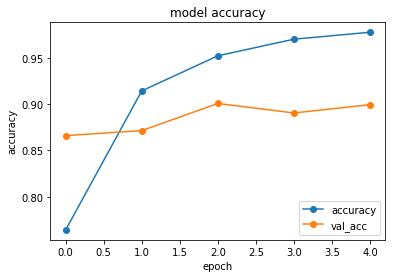

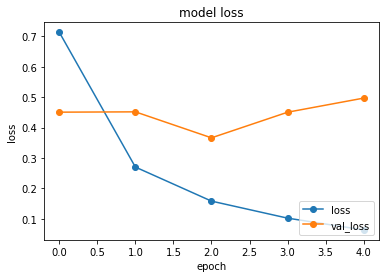

In [43]:
plot_history(history)

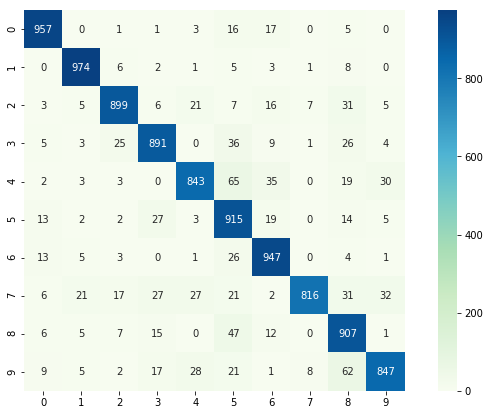

In [44]:
predict_classes = model.predict_classes(x_test)
true_classes = np.argmax(y_test, axis=1)
print_cmx(true_classes, predict_classes)

num: 43


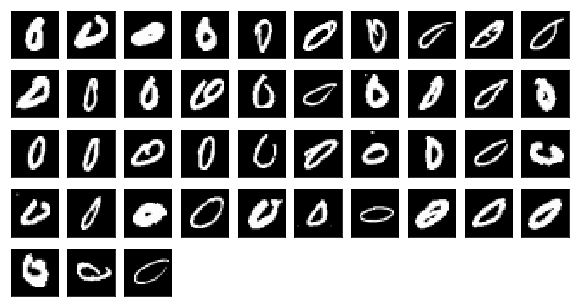

num: 26


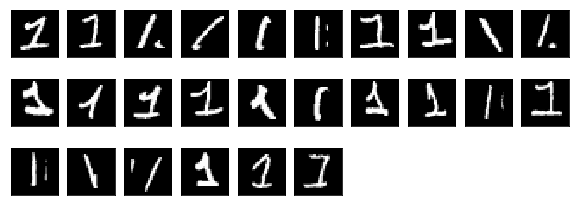

num: 101


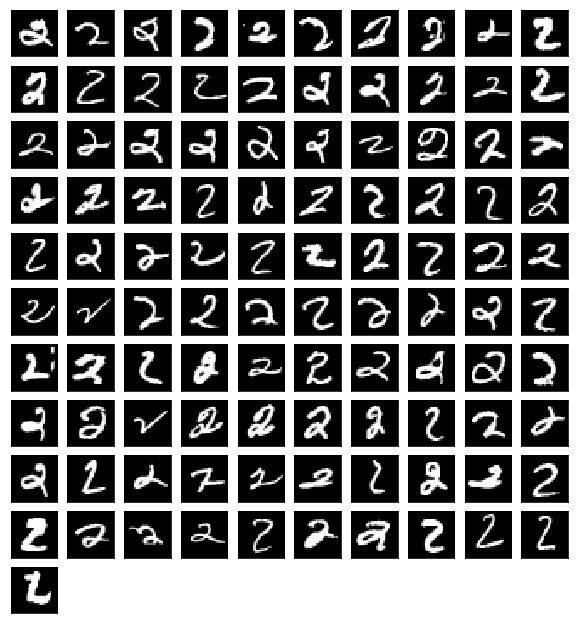

num: 109


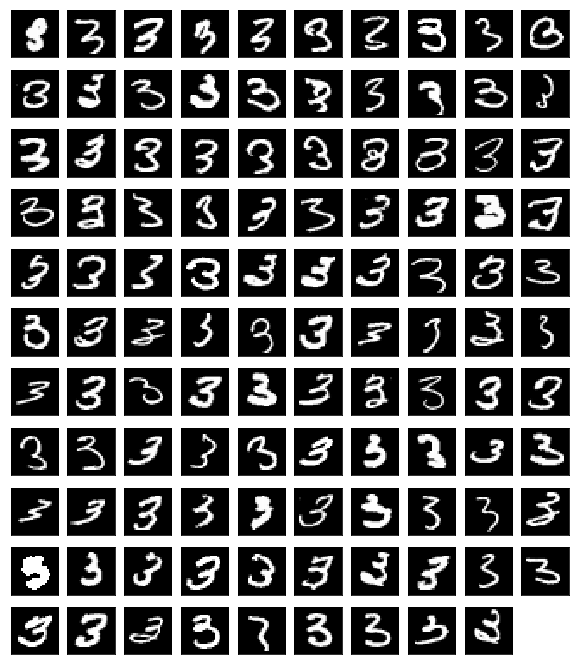

num: 157


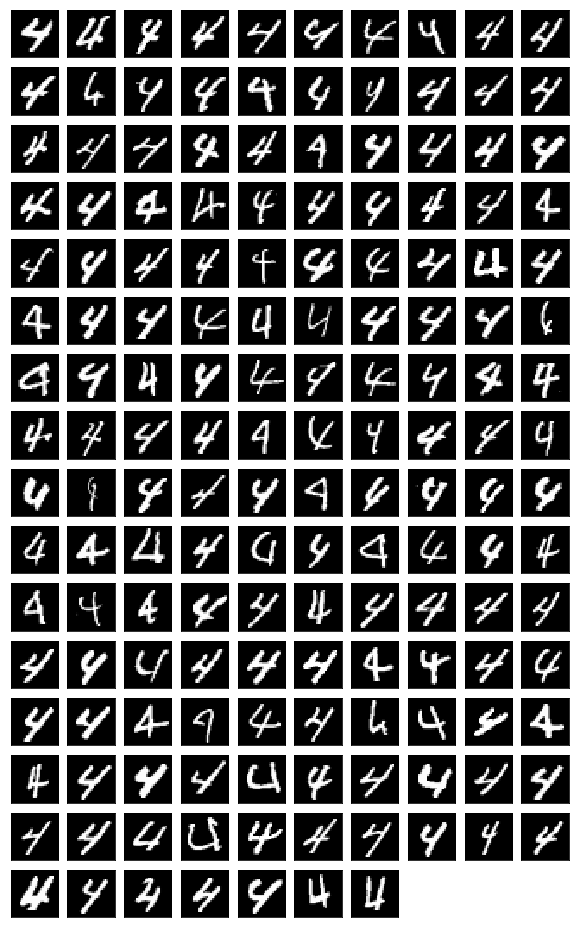

num: 85


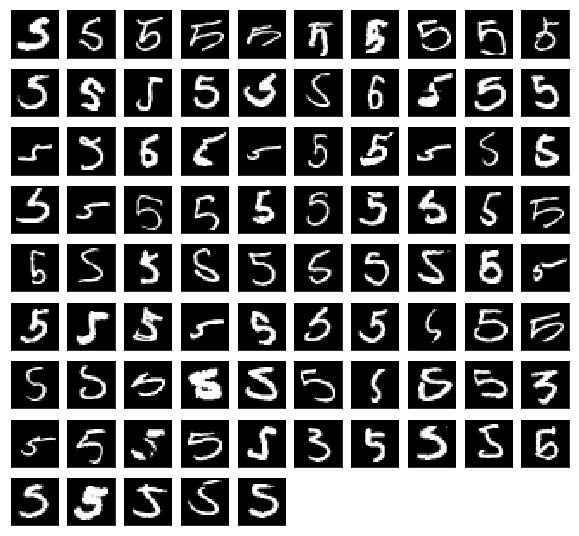

num: 53


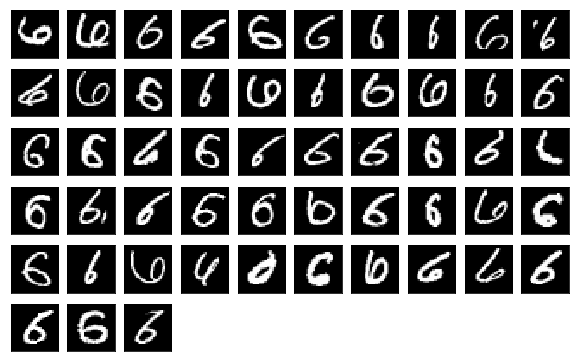

num: 184


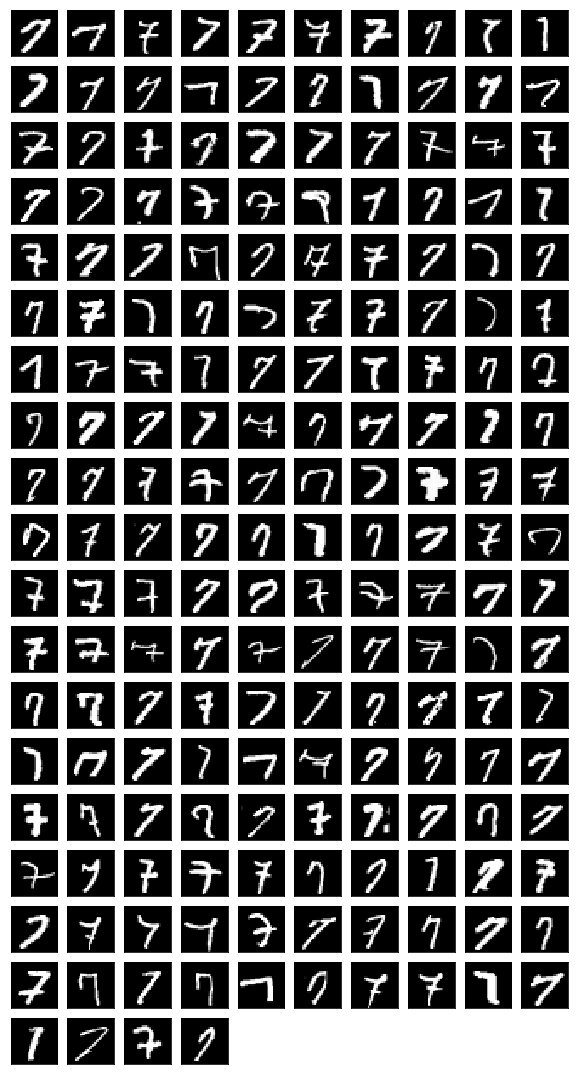

num: 93


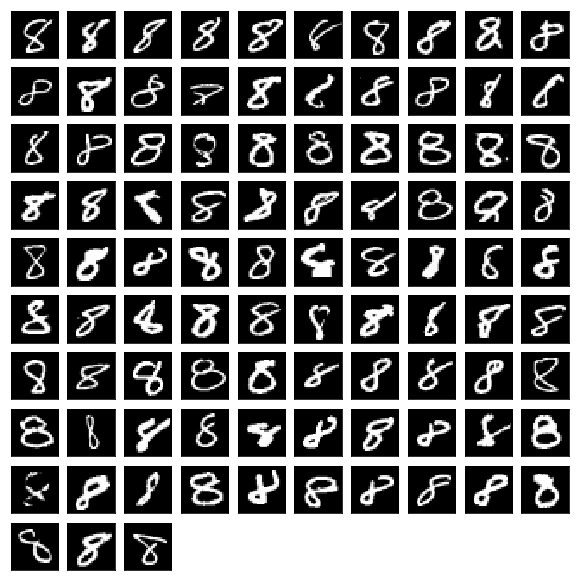

num: 153


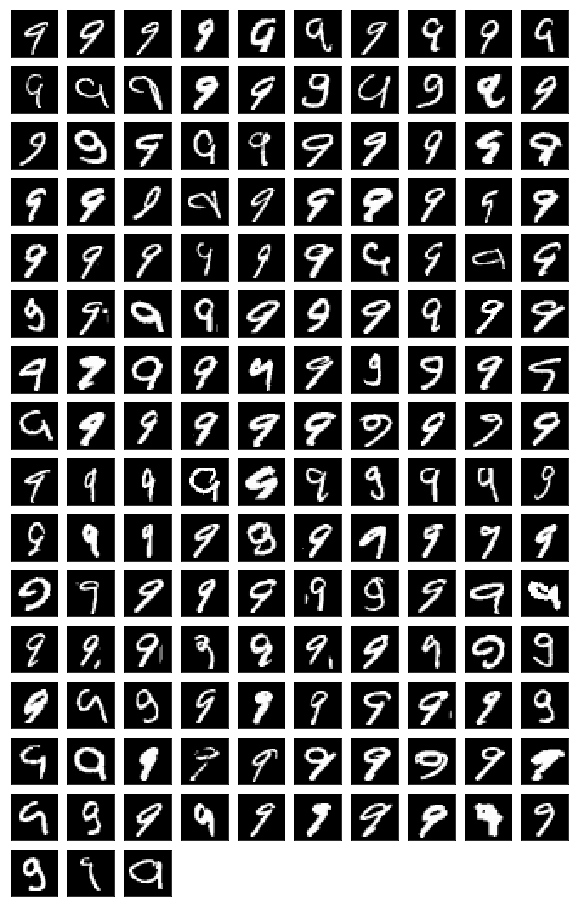

In [45]:
for i in range(num_classes):
    delta_i = find_index_delta_digit(model, x_test[:10000], y_test[:10000], i)
    print_mnist_img(x_test[delta_i])

In [16]:
'''
各数字がどのindexにあるかをまとめる。また、各数字における精度の差も表示する。
indexs : 各数字のindexのリストが格納されたリスト [[0のindex],[1のindex], ...]
'''
indexs = []
for i in range(num_classes):
    index = find_index_digit(y_test[:1000], i)
    indexs.append( index )
    score = model.evaluate(x_test[index], y_test[index], verbose=0)
    print("{}: original : {:.3f}".format(i, score[1]))

0: original : 0.979
1: original : 0.991
2: original : 0.935
3: original : 0.891
4: original : 0.948
5: original : 0.880
6: original : 0.908
7: original : 0.879
8: original : 0.907
9: original : 0.818


num: 200


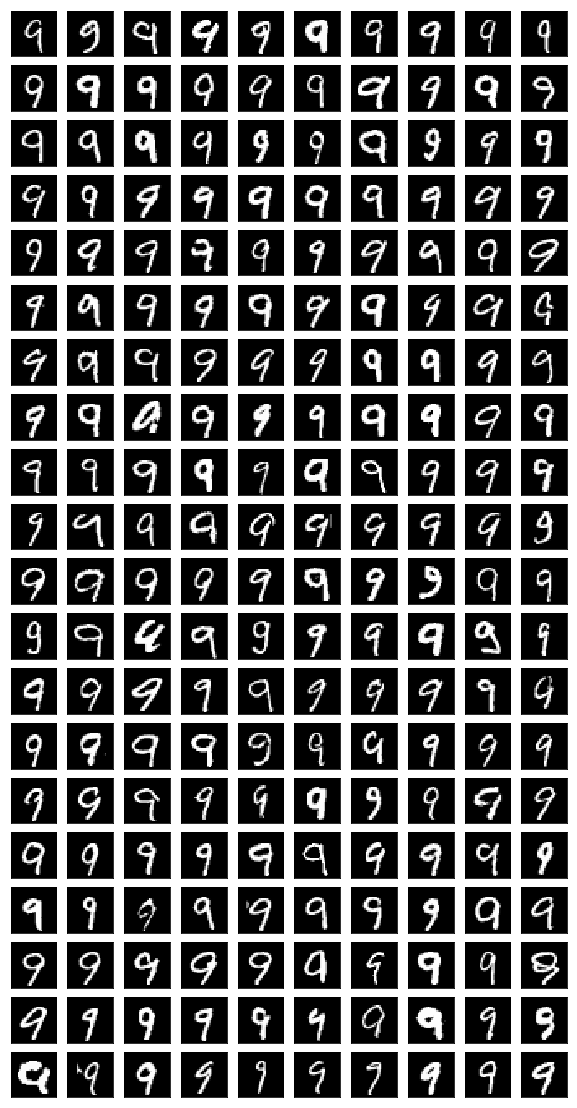

In [39]:
print_mnist_img_digit(x_train, y_train, 9)

In [ ]:
from keras.preprocessing. image import ImageDataGenerator